CNN Model

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [3]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

Install and import TensorFlow and dependencies:

In [4]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.5.0


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
print(os.listdir("/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair"))

['Train', 'Test', 'Train_1', '.ipynb_checkpoints', 'Test_1']


In [8]:
SIZE = 128

In [13]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_37_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_38_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_39_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_40_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_41_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_42_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_43_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_44_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train_1/HGG/P008_45_T2F_HGG_T.png
/content/gdrive/MyDrive/EE657 Re

In [14]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [16]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Test_1/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

In [17]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [19]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [20]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train_one_hot = to_categorical(y_train,3)
y_test_one_hot = to_categorical(y_test,3)

In [22]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())

#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(3, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496 

In [29]:
checkpoint_path = "/content/gdrive/MyDrive/EE657 Research/Check_points"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
#model.fit(train_images, 
 #         train_labels,  
  #        epochs=50,
   #       validation_data=(test_images, test_labels),
    #      callbacks=[cp_callback])  # Pass callback to training
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot),callbacks=[cp_callback])

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

RuntimeError: ignored

This creates a single collection of TensorFlow checkpoint files that are updated at the end of each epoch:

In [ ]:
os.listdir(checkpoint_dir)

['BRATS2015',
 'BRATS Images',
 'Colab Notebooks',
 'EE657 Progression.gdoc',
 'DataSet.gsheet',
 'Check_points',
 '.ipynb_checkpoints',
 'Check_points.data-00000-of-00001',
 'Check_points.index',
 'checkpoint']

As long as two models share the same architecture you can share weights between them. So, when restoring a model from weights-only, create a model with the same architecture as the original model and then set its weights. 

Now rebuild a fresh, untrained model and evaluate it on the test set. An untrained model will perform at chance levels (~10% accuracy):

In [ ]:
# Create a basic model instance
#model = create_model()


# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

# Evaluate the model
loss, acc = cnn_model.evaluate(x_test, y_test_one_hot, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        1849

Then load the weights from the checkpoint and re-evaluate:

In [23]:
# Loads the weights
cnn_model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = cnn_model.evaluate(x_test, y_test_one_hot, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

26/26 - 29s - loss: 8.3930 - accuracy: 0.1768
Restored model, accuracy: 17.68%


### Checkpoint callback options

The callback provides several options to provide unique names for checkpoints and adjust the checkpointing frequency.

Train a new model, and save uniquely named checkpoints once every five epochs:

In [24]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "/content/gdrive/MyDrive/EE657 Research/Check_points"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

# Create a new model instance
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)

# Save the weights using the `checkpoint_path` format
cnn_model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
#model.fit(train_images, 
 #         train_labels,
  #        epochs=50, 
   #       batch_size=batch_size, 
    #      callbacks=[cp_callback],
     ##    verbose=0)
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot),callbacks=[cp_callback])

RuntimeError: ignored

Now, look at the resulting checkpoints and choose the latest one:

In [10]:
os.listdir(checkpoint_dir)

NameError: ignored

In [9]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

NameError: ignored

Note: the default TensorFlow format only saves the 5 most recent checkpoints.

To test, reset the model and load the latest checkpoint:

In [ ]:
# Create a new model instance
#cnn_model = create_model()

# Load the previously saved weights
#model.load_weights(latest)

# Re-evaluate the model
#loss, acc = model.evaluate(test_images, test_labels, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

# Create a new model instance
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary())

# Loads the weights
cnn_model.load_weights(latest)

# Re-evaluate the model
loss, acc = cnn_model.evaluate(x_test, y_test_one_hot, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)        1849

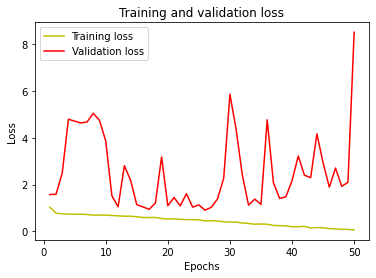

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

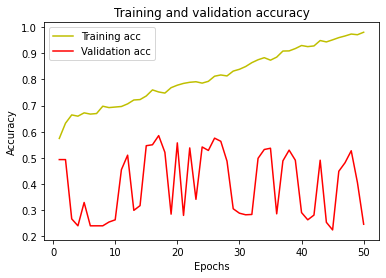

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[  0   0   0  21  49 129]
 [  0   0   0  59  40 122]
 [  0   0   0  14  31 364]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


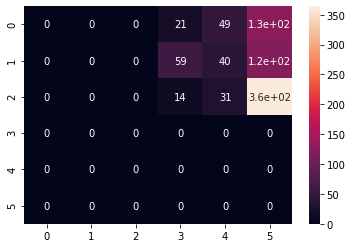

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

The prediction for this image is:  ['/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train/LGG']
The actual label for this image is:  /content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Test/HGG


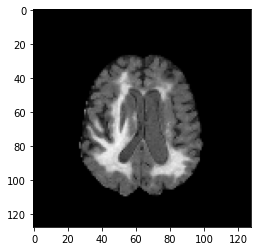

In [ ]:
#Check results on a few select images

#n=5 dog park. NN not as good as RF.
n=389  #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

Accuracy =  0.0
The prediction for this image is:  ['/content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Train/LGG']
The actual label for this image is:  /content/gdrive/MyDrive/EE657 Research/BRATS Images/All_T2_Flair/Test/HGG_LGG


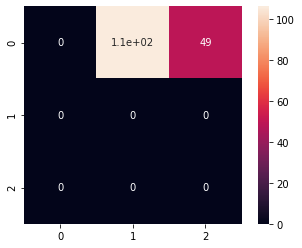

In [ ]:
################################
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=9 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

## What are these files?

The above code stores the weights to a collection of [checkpoint](https://www.tensorflow.org/guide/saved_model#save_and_restore_variables)-formatted files that contain only the trained weights in a binary format. Checkpoints contain:
* One or more shards that contain your model's weights.
* An index file that indicates which weights are stored in which shard.

If you are training a model on a single machine, you'll have one shard with the suffix: `.data-00000-of-00001`

## Manually save weights

Manually saving weights with the `Model.save_weights` method. By default, `tf.keras`—and `save_weights` in particular—uses the TensorFlow [checkpoint](../../guide/checkpoint.ipynb) format with a `.ckpt` extension (saving in [HDF5](https://js.tensorflow.org/tutorials/import-keras.html) with a `.h5` extension is covered in the [Save and serialize models](../../guide/keras/save_and_serialize#weights-only_saving_in_savedmodel_format) guide):

In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model()

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

## Save the entire model

Call [`model.save`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#save) to save a model's architecture, weights, and training configuration in a single file/folder. This allows you to export a model so it can be used without access to the original Python code*. Since the optimizer-state is recovered, you can resume training from exactly where you left off.

An entire model can be saved in two different file formats (`SavedModel` and `HDF5`). The TensorFlow `SavedModel` format is the default file format in TF2.x. However, models can be saved in `HDF5` format. More details on saving entire models in the two file formats is described below.

Saving a fully-functional model is very useful—you can load them in TensorFlow.js ([Saved Model](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model), [HDF5](https://www.tensorflow.org/js/tutorials/conversion/import_keras)) and then train and run them in web browsers, or convert them to run on mobile devices using TensorFlow Lite ([Saved Model](https://www.tensorflow.org/lite/convert/python_api#converting_a_savedmodel_), [HDF5](https://www.tensorflow.org/lite/convert/python_api#converting_a_keras_model_))

\*Custom objects (e.g. subclassed models or layers) require special attention when saving and loading. See the **Saving custom objects** section below 

### SavedModel format

The SavedModel format is another way to serialize models. Models saved in this format can be restored using `tf.keras.models.load_model` and are compatible with TensorFlow Serving. The [SavedModel guide](https://www.tensorflow.org/guide/saved_model) goes into detail about how to serve/inspect the SavedModel. The section below illustrates the steps to save and restore the model.

In [ ]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

The SavedModel format is a directory containing a protobuf binary and a TensorFlow checkpoint. Inspect the saved model directory:

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

Reload a fresh Keras model from the saved model:

In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

The restored model is compiled with the same arguments as the original model. Try running evaluate and predict with the loaded model:

In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

### HDF5 format

Keras provides a basic save format using the [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) standard. 

In [ ]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5') 

NameError: ignored

Now, recreate the model from that file:

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

OSError: ignored

Check its accuracy:

In [ ]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Keras saves models by inspecting their architectures. This technique saves everything:

* The weight values
* The model's architecture
* The model's training configuration (what you pass to the `.compile()` method)
* The optimizer and its state, if any (this enables you to restart training where you left off)

Keras is not able to save the `v1.x` optimizers (from `tf.compat.v1.train`) since they aren't compatible with checkpoints. For v1.x optimizers, you need to re-compile the model after loading—losing the state of the optimizer.


### Saving custom objects

If you are using the SavedModel format, you can skip this section. The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

To save custom objects to HDF5, you must do the following:

1. Define a `get_config` method in your object, and optionally a `from_config` classmethod.
  * `get_config(self)` returns a JSON-serializable dictionary of parameters needed to recreate the object.
  * `from_config(cls, config)` uses the returned config from `get_config` to create a new object. By default, this function will use the config as initialization kwargs (`return cls(**config)`).
2. Pass the object to the `custom_objects` argument when loading the model. The argument must be a dictionary mapping the string class name to the Python class. E.g. `tf.keras.models.load_model(path, custom_objects={'CustomLayer': CustomLayer})`

See the [Writing layers and models from scratch](https://www.tensorflow.org/guide/keras/custom_layers_and_models) tutorial for examples of custom objects and `get_config`.
